In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Aras

In [2]:
aras_A = pd.read_csv("processed_data/Aras_HouseA.csv")
#aras_A = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/processed_data/HouseA_final1.csv")

In [20]:
aras = aras_A

In [21]:
x = aras["sensor_id"].value_counts(sort = True)
x

7125    6928
5893    6830
5889    3313
5896    2172
6253    1240
5895    1206
5888     466
Name: sensor_id, dtype: int64

In [22]:
l = []
for i in x.index:
  l.append(str(i))

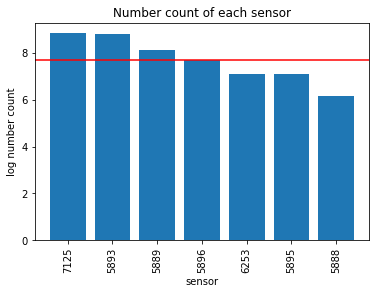

In [23]:
plt.bar(l, np.log(x.values))
plt.axhline(y=np.log(x.values).mean(), color='r', linestyle='-')
plt.xticks(rotation='vertical')
plt.title("Number count of each sensor")
plt.xlabel("sensor")
plt.ylabel("log number count")
plt.show()

In [24]:
aras_B = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/processed_data/HouseB_final1.csv")

x = aras_B["sensor_id"].value_counts(sort = True)
x



5893    2174
5889    1656
7125    1420
5895    1262
6253     504
5888     118
5896      78
Name: sensor_id, dtype: int64

In [25]:
l = []
for i in x.index:
  l.append(str(i))

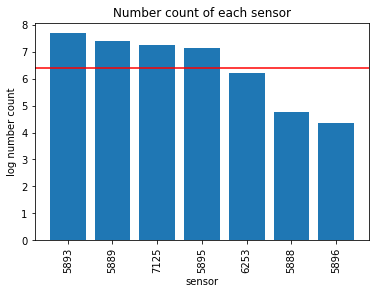

In [26]:
plt.bar(l, np.log(x.values))
plt.axhline(y=np.log(x.values).mean(), color='r', linestyle='-')
plt.xticks(rotation='vertical')
plt.title("Number count of each sensor")
plt.xlabel("sensor")
plt.ylabel("log number count")
plt.show()

# Multi data set

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
#multi = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/processed_data/3_months_data_with_weekday.csv")
multi = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/processed_data/multi_final1.csv")

In [28]:
t = multi
timestamp = pd.to_datetime(t["timestamp"])
week = timestamp.dt.week
t["timestamp"] = timestamp
t["week"] = week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
day = timestamp.dt.dayofyear
t["day"] = day

In [30]:
t.iloc[:1000]

,Unnamed: 0,Unnamed: 0.1,sensor_id,value,time_scal,timestamp,weekday,time,event,week,day
0,0,0,5895,0.0,0.702025,2020-03-24 16:50:55.754753,1,60655.0,0,13,84
1,1,1,5889,0.0,0.702037,2020-03-24 16:50:56.015072,1,60656.0,20,13,84
2,2,2,5896,0.0,0.702037,2020-03-24 16:50:56.068567,1,60656.0,4,13,84
3,3,3,6253,0.0,0.702037,2020-03-24 16:50:56.114845,1,60656.0,6,13,84
4,4,4,5887,0.0,0.702037,2020-03-24 16:50:56.145422,1,60656.0,16,13,84
...,...,...,...,...,...,...,...,...,...,...,...
995,994,944,5895,1.0,0.860903,2020-03-25 20:39:42.247327,2,74382.0,1,13,85
996,995,945,5896,0.0,0.864190,2020-03-25 20:44:26.595960,2,74666.0,4,13,85
997,996,946,5895,0.0,0.917847,2020-03-25 22:01:42.199759,2,79302.0,0,13,85
998,997,947,5895,1.0,0.918438,2020-03-25 22:02:33.208363,2,79353.0,1,13,85


## sensors

In [35]:
x = t["sensor_id"].value_counts()

In [36]:
x

5895    7505
5893    6115
5887    2317
6253    2069
5896    1731
5889    1603
6632     873
7125     736
5888     675
6633     219
6896      65
6635      21
Name: sensor_id, dtype: int64

In [37]:
l = []
for i in x.index:
  l.append(str(i))

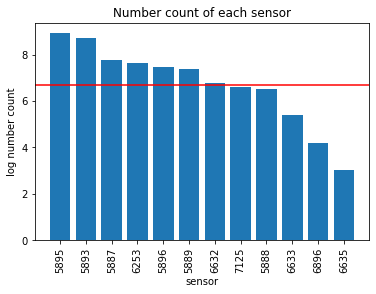

In [38]:
plt.bar(l, np.log(x.values))
plt.axhline(y=np.log(x.values).mean(), color='r', linestyle='-')
plt.xticks(rotation='vertical')
plt.title("Number count of each sensor")
plt.xlabel("sensor")
plt.ylabel("log number count")
plt.show()

# weekday

In [39]:
g_weekday = t.groupby(["weekday"])

In [40]:
x = g_weekday.size()

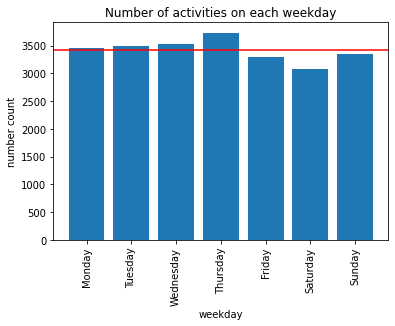

In [41]:
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], x.values)
plt.axhline(y=g_weekday.size().mean(), color='r', linestyle='-')
plt.xticks(rotation='vertical')
plt.title("Number of activities on each weekday")
plt.xlabel("weekday")
plt.ylabel("number count")
plt.show()

# Week

In [42]:
g_week = t.groupby(["week"])

In [43]:
x = g_week.size()


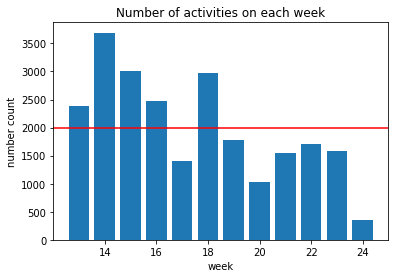

In [44]:
plt.bar(x.index, x.values)
plt.axhline(y=g_week.size().mean(), color='r', linestyle='-')
plt.title("Number of activities on each week")
plt.xlabel("week")
plt.ylabel("number count")
plt.xticks()
plt.show()

# day

In [45]:
g_day = t.groupby(["day"])
x = g_day.size()

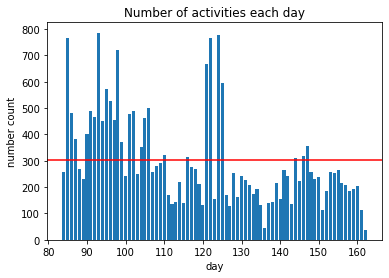

In [46]:
plt.bar(x.index, x.values)
plt.axhline(y=g_day.size().mean(), color='r', linestyle='-')
plt.xticks()
plt.title("Number of activities each day")
plt.xlabel("day")
plt.ylabel("number count")
plt.show()

### Peak is 147

In [ ]:
g_day.size().idxmax()

147

In [ ]:
day147 = g_day.get_group(130)

In [ ]:
day147["sensor_id"].value_counts()

5893    156
5887     78
5896     56
5888     14
7125     10
Name: sensor_id, dtype: int64

In [ ]:
pd.set_option("max_rows", None)
x = day147[day147["sensor_id"] == 5893]

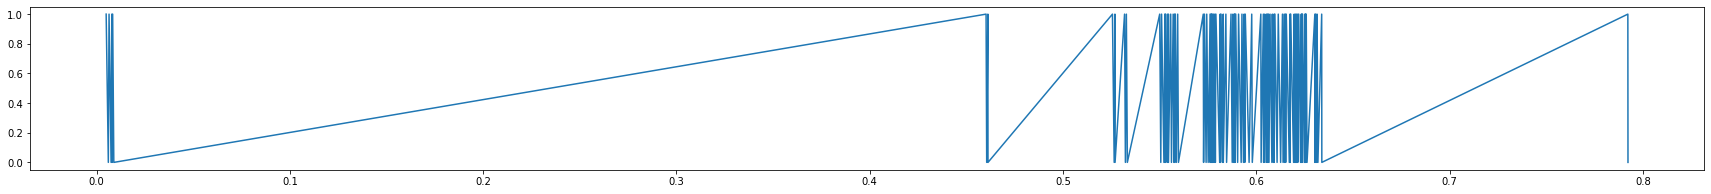

In [ ]:
plt.figure(figsize=(30,3))
plt.plot(x["time_scal"],x["value"] )

In [ ]:
g_day = t.groupby(["day"])

In [ ]:
max = 0
ind = 0
for name, group in g_day:
    a = len(pd.unique(group["sensor_id"]))
    if a > max:
      print(a)
      max = a
      ind = name

9
10


In [ ]:
n = pd.unique(g_day.get_group(ind)["sensor_id"])

In [ ]:
max_sensor = g_day.get_group(ind)

In [ ]:
max_sensor[max_sensor["timestamp"].dt.hour == 11]

# One day of data

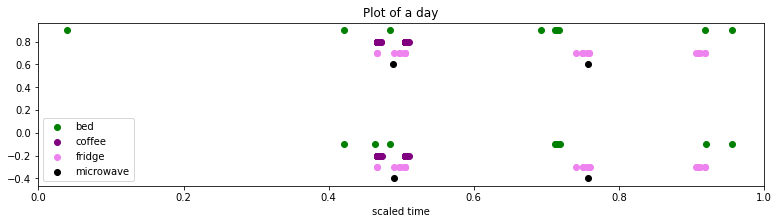

In [ ]:
plt.figure(figsize=(13,3))
plt.title(f"Plot of a day")
plt.xlabel("scaled time")
plt.xlim([0,1])

## bed pressure
x = max_sensor[max_sensor["sensor_id"] == n[1]]
plt.scatter(x["time_scal"],x["value"]-0.1, label = "bed", c = "green", alpha = 1)

## coffee maker
x = max_sensor[max_sensor["sensor_id"] == n[4]]
plt.scatter(x["time_scal"],x["value"]-0.2, c ="purple", label= "coffee")

## fridge
x = max_sensor[max_sensor["sensor_id"] == n[5]]
plt.scatter(x["time_scal"],x["value"]-0.3, c = "violet", label = "fridge")

## microwave
x = max_sensor[max_sensor["sensor_id"] == n[6]]
plt.scatter(x["time_scal"],x["value"]-0.4, c = "black", label = "microwave")

plt.legend()
plt.show()


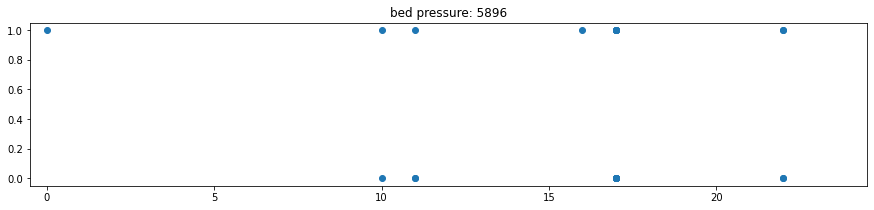

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[1]]

plt.figure(figsize=(15,3))
plt.title(f"bed pressure: {n[1]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

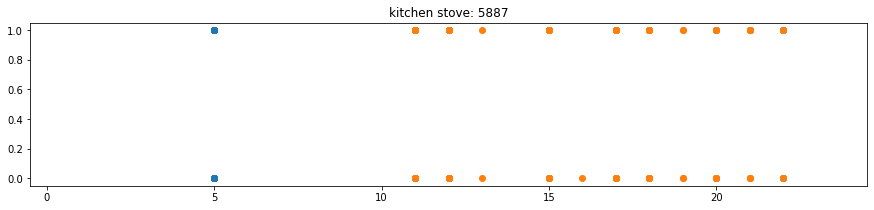

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[2]]

plt.figure(figsize=(15,3))
plt.title(f"kitchen stove: {n[2]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

x = max_sensor[max_sensor["sensor_id"] == n[3]]
plt.scatter(x["timestamp"].dt.hour,x["value"])


plt.show()

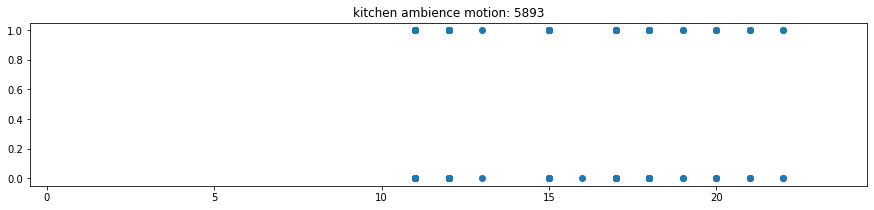

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[3]]

plt.figure(figsize=(15,3))
plt.title(f"kitchen ambience motion: {n[3]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

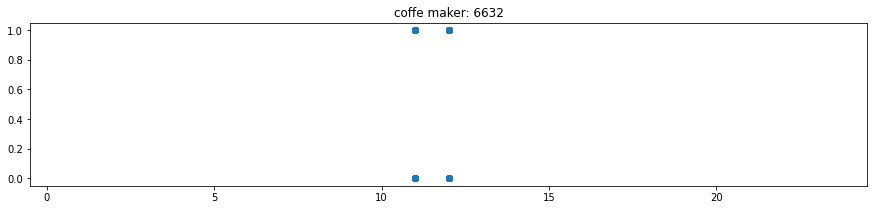

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[4]]
plt.scatter(x["timestamp"].dt.hour,x["value"])
plt.figure(figsize=(15,3))
plt.title(f"coffe maker: {n[4]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

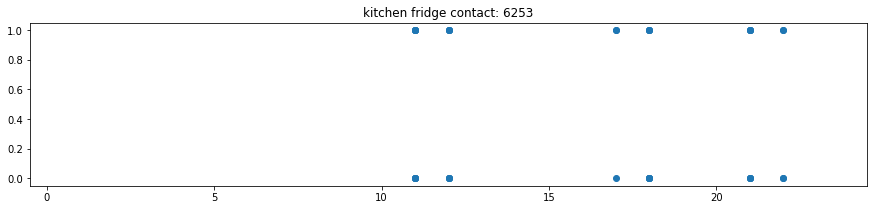

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[5]]
plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.figure(figsize=(15,3))
plt.title(f"kitchen fridge contact: {n[5]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

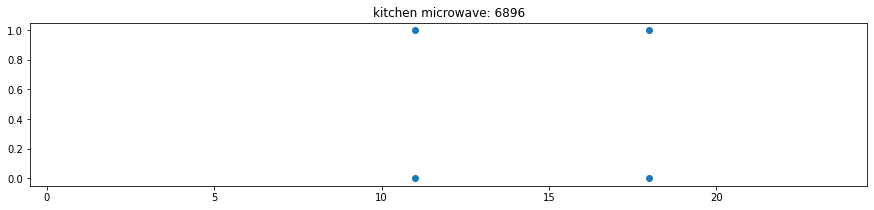

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[6]]

plt.figure(figsize=(15,3))
plt.title(f"kitchen microwave: {n[6]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

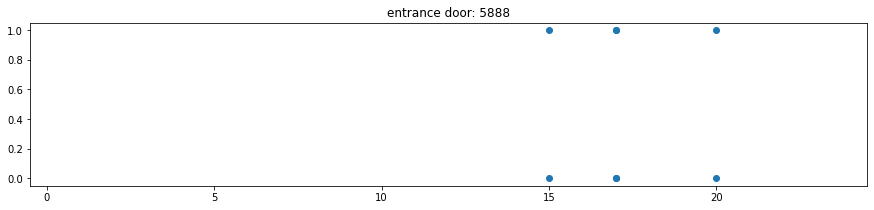

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[7]]

plt.figure(figsize=(15,3))
plt.title(f"entrance door: {n[7]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

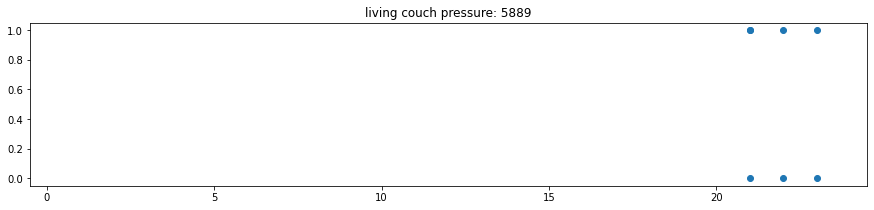

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[8]]

plt.figure(figsize=(15,3))
plt.title(f"living couch pressure: {n[8]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()

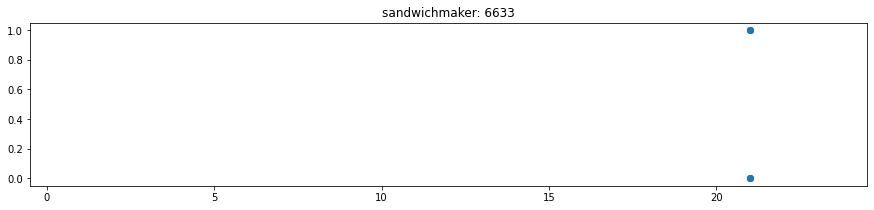

In [ ]:
x = max_sensor[max_sensor["sensor_id"] == n[9]]

plt.figure(figsize=(15,3))
plt.title(f"sandwichmaker: {n[9]}")
plt.xlim([-0.5,24.5])

plt.scatter(x["timestamp"].dt.hour,x["value"])

plt.show()